# DATASET GRUPO - CARDIO

### O Dataset
Vamos usar o dataset <em>cardio_train.csv</em>. <br/>
Este dataset contém 70000 entradas e 13 atributos, incluindo:


- Id | Objective Feature | id | int 
- Age | Objective Feature | age | int (days) 
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code | 1: female, 2: male |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Descrição dos dados:<br/> 
Existem 3 tipos de atributos de input:

- Objective: informação factual;
- Examination: resultados de examinação médica;
- Subjective: informação dada pelo paciente.

O target é o atributo <em>cardio<em>

## Importar bibliotecas

In [116]:
%pip install "notebook>=5.3" "ipywidgets>=7.5"

Note: you may need to restart the kernel to use updated packages.


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Obter os dados 

In [118]:
cardio_original = pd.read_csv('cardio_train.csv')

In [119]:
cardio_original.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [120]:
cardio_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [121]:
cardio_original.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

# Lidar com dados em falta e possiveis conversões de dados
- Remover missing values, outliers, e linhas/colunas desnecessárias 

## 1. Missing Values

- Não existem missing values neste dataset

In [122]:
cardio_original.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: >

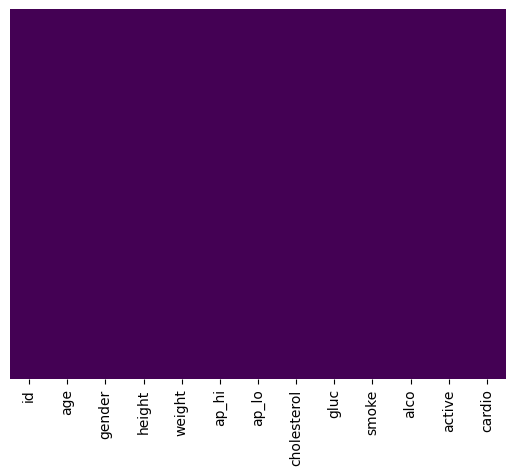

In [123]:
sns.heatmap(cardio_original.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### 2. Drop 
Vamos analisar como os dados na coluna <em>id</em> são apresentados 

In [124]:
cardio_original['id']

0            0
1            1
2            2
3            3
4            4
         ...  
69995    99993
69996    99995
69997    99996
69998    99998
69999    99999
Name: id, Length: 70000, dtype: int64

O atributo <em>id</em> para além de ser apenas um valor incremental, também não possui informação relevante para a análise do dataset. <br/>
Logo pode ser removido.

#### a) Drop do atributo <em>id</em>

In [125]:
cardio_original.drop(['id'], axis=1, inplace=True)
cardio_original.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [126]:
cardio_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


#### b) Análise de valores únicos

In [127]:
# Ver quantos valores unicos existem para cada atributo
cardio_original.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

Como todos os atributos possuem pelo menos dois valores únicos, não se vai eliminar nenhum deles com base neste critério.

## 3. Substituir valores categóricos
Este passo já está feito. <br/>
O dataset já vinha previamente configurado de forma a substituir valores categóricos. <br/>
Um exemplo disso são os valores <em>Female<em> e <em>Male<em> do atributo <em>Gender<em> substituidos por 1 e 2 respetivamente.

Let's create a barplot of <em>Frequency Distribution of Incidents</em> (style="darkgrid", fontsize=12)

In [128]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occorrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)
plt.show()

NameError: name 'data' is not defined

Let's create a pie plot of <em>Category Distribution of Incidents</em>

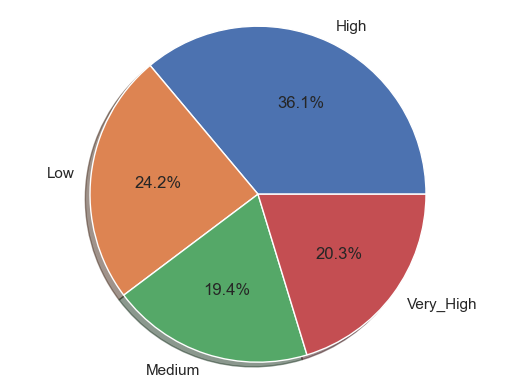

In [ ]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

We have several options how to deal with qualitative data:

## 4. Outliers

In [ ]:
from plotly.subplots import make_subplots

# vamos criar uma cópia do datset
cardio_copia1 = cardio_original.copy()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------

#fig = make_subplots(rows=1, cols=3, subplot_titles=("Idade (em dias)", "Género", "Altura", "Peso"))
fig = make_subplots(rows=1, cols=3, subplot_titles=("Idade (em dias)", "Altura", "Peso"))
fig1 = px.box(cardio_copia1, y="age")
#fig2 = px.box(cardio_copia1, y="gender")    # ESTE ATRIBUTO É BINÁRIO. NÃO ME PARECE MUITO INTERESSANTE FAZER OUTLIER DISTO
fig3 = px.box(cardio_copia1, y="height")
fig4 = px.box(cardio_copia1, y="weight")

fig.add_trace(fig1.data[0], row=1, col=1)
#fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=2)
fig.add_trace(fig4.data[0], row=1, col=3)

fig.update_layout(showlegend=False)

fig.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------

fig = make_subplots(rows=1, cols=4, subplot_titles=("Pressão arterial sistólica", "Pressão arterial diastólica", "Colestrol", "Glucose"))
fig5 = px.box(cardio_copia1, y="ap_hi")
fig6 = px.box(cardio_copia1, y="ap_lo")
fig7 = px.box(cardio_copia1, y="cholesterol")
fig8 = px.box(cardio_copia1, y="gluc")          

fig.add_trace(fig5.data[0], row=1, col=1)
fig.add_trace(fig6.data[0], row=1, col=2)
fig.add_trace(fig7.data[0], row=1, col=3)
fig.add_trace(fig8.data[0], row=1, col=4)


fig.update_layout(showlegend=False)

fig.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------


# ESTES ATRIBUTOS SÃO BINÁRIOS. NÃO ME PARECE MUITO INTERESSANTE FAZER OUTLIER DISTO

#fig = make_subplots(rows=1, cols=4, subplot_titles=("Fumador", "Alcoólico", "Atividade fisica", "Tem doença cardiovascular"))
#fig5 = px.box(cardio_copia1, y="smoke")
#fig6 = px.box(cardio_copia1, y="alco")
#fig7 = px.box(cardio_copia1, y="active")
#fig8 = px.box(cardio_copia1, y="cardio")

#fig.add_trace(fig5.data[0], row=1, col=1)
#fig.add_trace(fig6.data[0], row=1, col=2)
#fig.add_trace(fig7.data[0], row=1, col=3)
#fig.add_trace(fig8.data[0], row=1, col=4)


#fig.update_layout(showlegend=False)

#fig.show()


Vamos ver o número de outliers que temos para cada um dos atributos em cima

In [ ]:
cols = ["age","height","weight","ap_hi","ap_lo","cholesterol","gluc"]
cardio_copia2 = cardio_copia1.copy()

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outlier_counts = {}
for col in cols:
    outlier_count = count_outliers(cardio_copia2[col])
    outlier_counts[col] = outlier_count


for col, count in outlier_counts.items():
    print(f"Nº de outliers em '{col}': {count}")

Nº de outliers em 'age': 4
Nº de outliers em 'height': 519
Nº de outliers em 'weight': 1819
Nº de outliers em 'ap_hi': 1435
Nº de outliers em 'ap_lo': 4632
Nº de outliers em 'cholesterol': 0
Nº de outliers em 'gluc': 10521


# Exploração de dados


## 1. Modificar atributo de idade

In [ ]:
cardio_copia3 = cardio_original.copy()

In [ ]:
cardio_copia3['age'].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

Vamos converter as idades que estão em dias para anos

In [ ]:
cardio_copia3['age'] =  round(cardio_copia3['age'] / 365)

In [ ]:
cardio_copia3['age'].head()

0    50.0
1    55.0
2    52.0
3    48.0
4    48.0
Name: age, dtype: float64

Iremos usar esta conversão apenas para efeitos de exploração de dados. <br/>
Assim evitamos inserir novos valores e ficamos com uma visão melhor do dataset

In [ ]:
cardio_copia3.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.0       2     168    62.0    110     80            1     1      0     0   
1  55.0       1     156    85.0    140     90            3     1      0     0   
2  52.0       1     165    64.0    130     70            3     1      0     0   
3  48.0       2     169    82.0    150    100            1     1      0     0   
4  48.0       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0

In [ ]:
cardio_copia3.nunique()

age             28
gender           2
height         109
weight         287
ap_hi          153
ap_lo          157
cholesterol      3
gluc             3
smoke            2
alco             2
active           2
cardio           2
dtype: int64

Esta conversão permitiu diminuir o número de valores únicos da coluna <em>age<em>

## 2. Matriz de correlação

<Axes: >

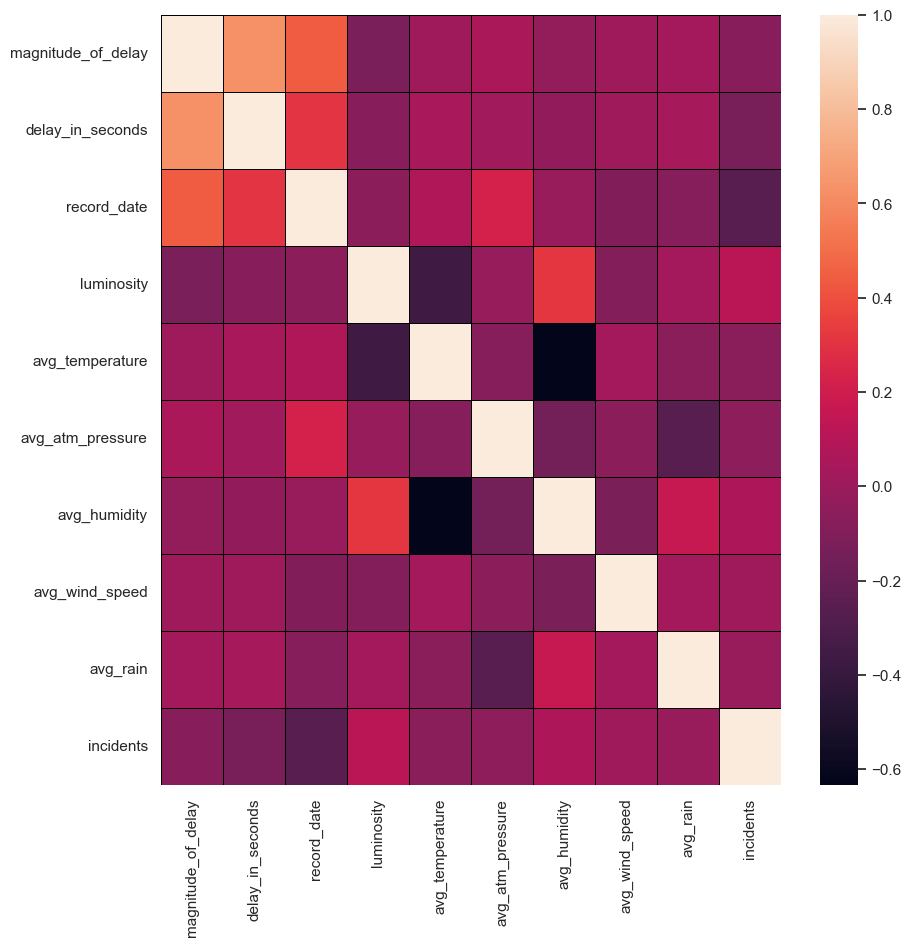

In [ ]:
fig = plt.figure(figsize = (10,10))
incidents_corr = data.corr(method='pearson')
sns.heatmap(incidents_corr, linecolor='black', linewidths=0.5)

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

d:\Users\Afonso Marques\miniconda3\envs\virtualEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


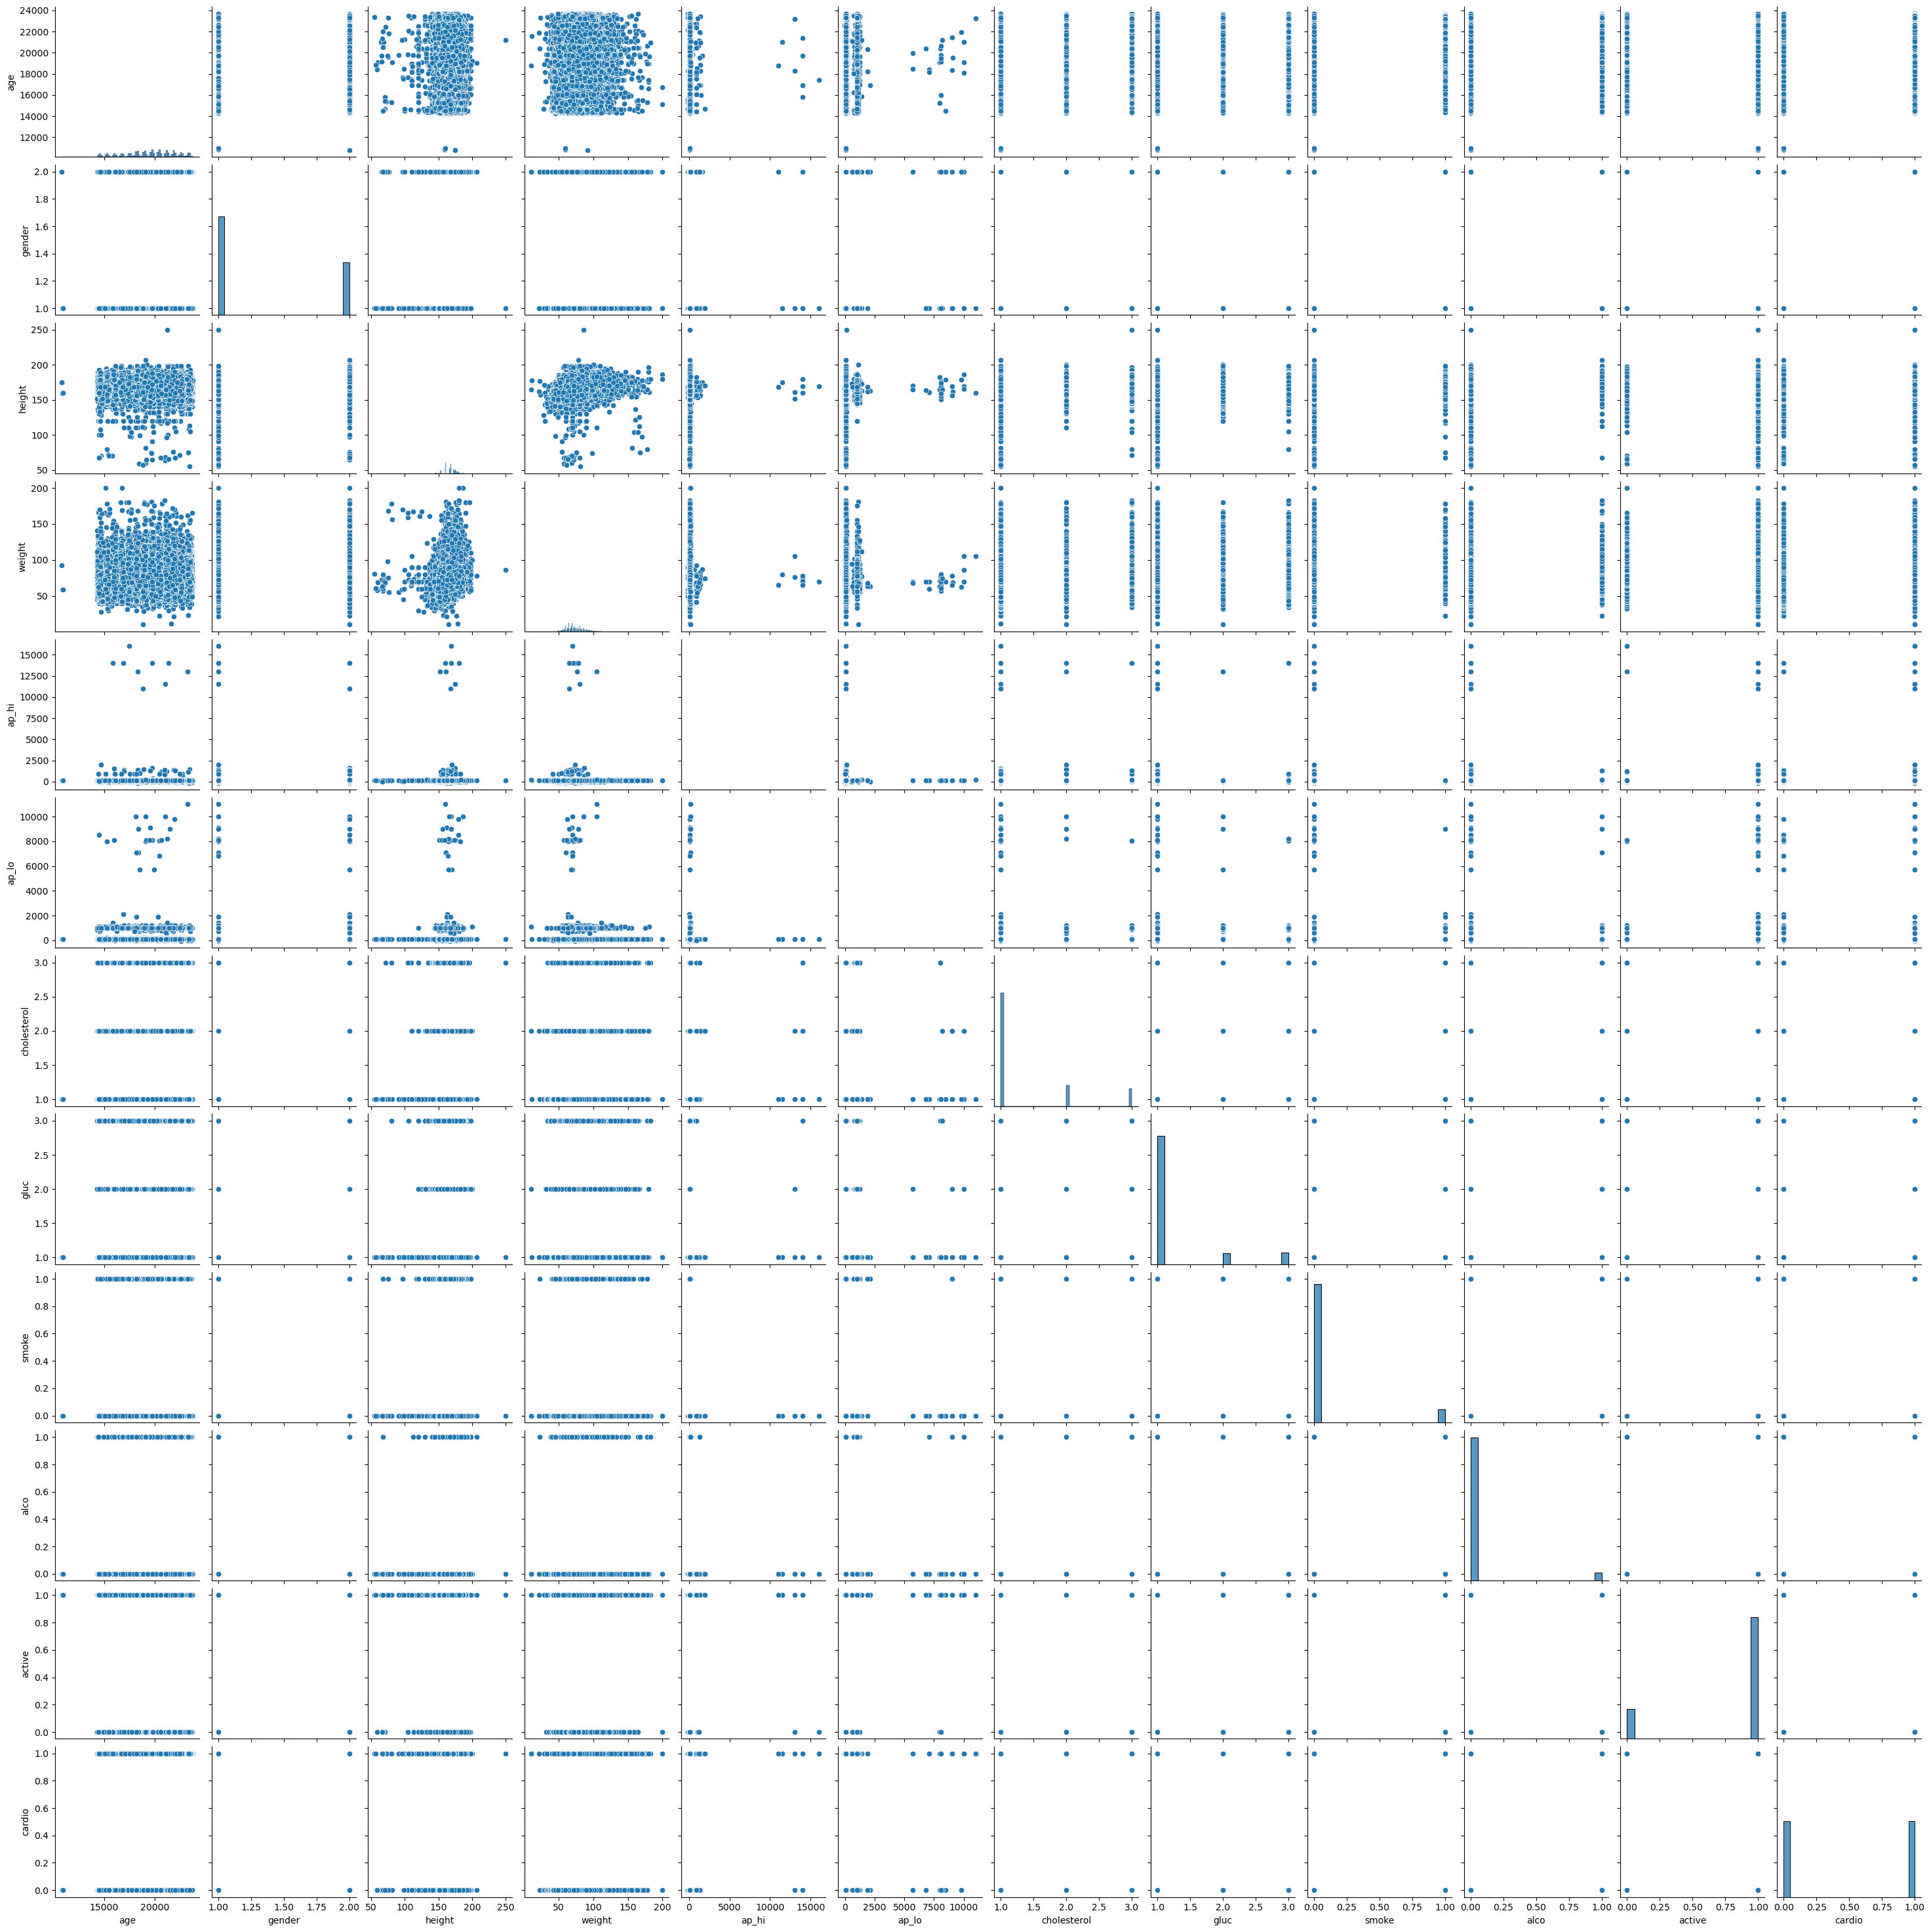

In [ ]:
sns.pairplot(cardio_original)

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

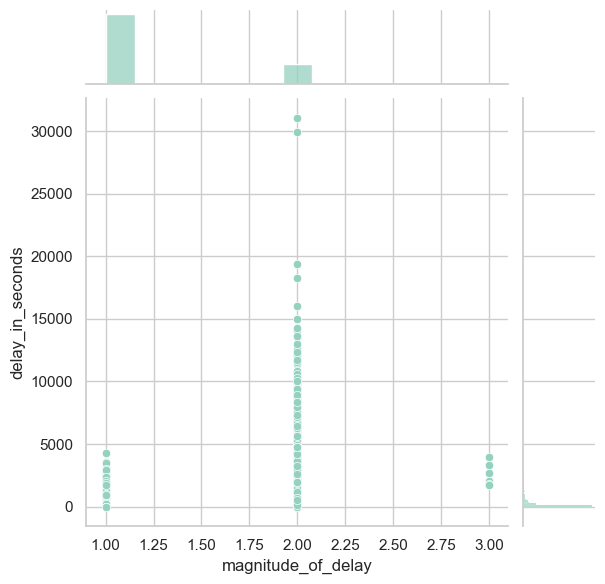

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='magnitude_of_delay', y='delay_in_seconds', data=data)

Jointplot <em>Luminosity vs. Avg_temperature</em>

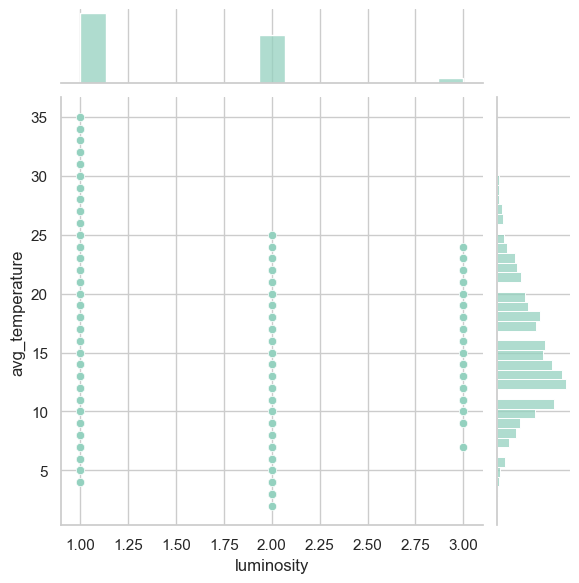

In [ ]:
sns.jointplot(x='luminosity', y='avg_temperature', data=data)

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

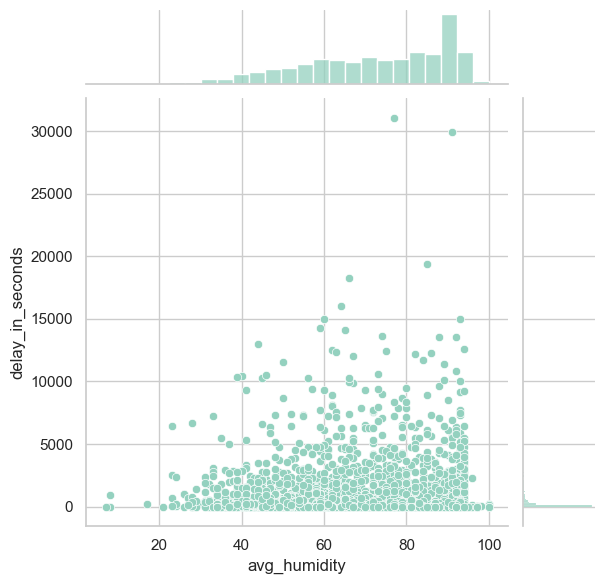

In [ ]:
sns.jointplot(x='avg_humidity', y='delay_in_seconds', data=data)

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

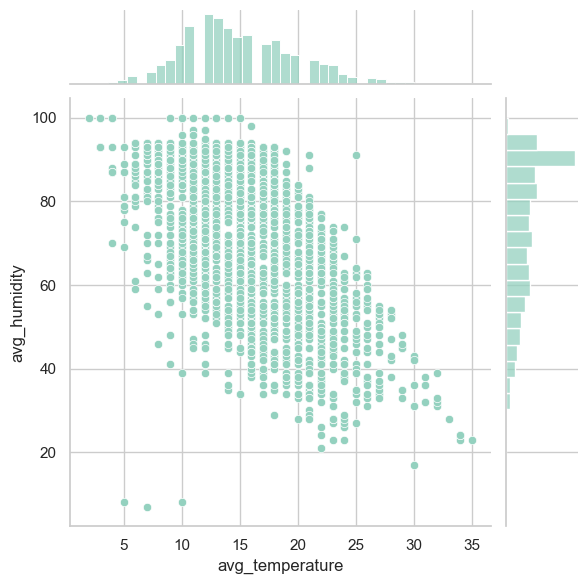

In [ ]:
sns.jointplot(x='avg_temperature', y='avg_humidity', data=data)

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>

d:\Users\Afonso Marques\miniconda3\envs\virtualEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


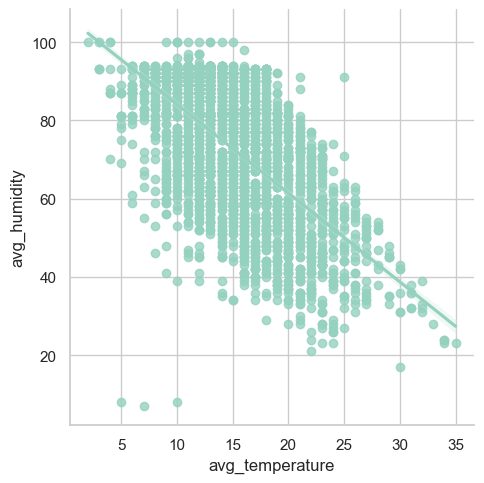

In [ ]:
sns.lmplot(x='avg_temperature', y='avg_humidity', data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_rain            2972 non-null   int64         
 9   incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 319.9 KB


In [ ]:
data.head()

magnitude_of_delay  delay_in_seconds         record_date  luminosity  \
2                   1                69 2021-03-12 15:00:00           1   
3                   2              2297 2021-09-29 09:00:00           1   
4                   1                 0 2021-06-13 11:00:00           1   
5                   1                 0 2021-12-07 23:00:00           2   
6                   1                 0 2021-12-05 05:00:00           2   

   avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  \
2             14.0            1025.0          64.0             0.0         1   
3             15.0            1028.0          75.0             1.0         1   
4             27.0            1020.0          52.0             1.0         1   
5              9.0            1015.0          94.0             0.0         1   
6              8.0            1026.0          87.0             1.0         1   

   incidents  
2          1  
3          2  
4          3  
5          4  
6          1